<a href="https://colab.research.google.com/github/gyumin5524/Machine-Learning/blob/main/%ED%95%84%EC%88%98%EA%B3%BC%EC%A0%9C2%EB%B2%88_%EB%B9%84%EC%A7%80%EB%8F%84%ED%95%99%EC%8A%B5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [8]:
import pandas as pd

In [9]:
import numpy as np

In [10]:
from google.colab import files

In [11]:
uploaded = files.upload()

Saving Mall_Customers.csv to Mall_Customers.csv


In [17]:
file_name = list(uploaded.keys())[0]
data = pd.read_csv(file_name)
data

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40
...,...,...,...,...,...
195,196,Female,35,120,79
196,197,Female,45,126,28
197,198,Male,32,126,74
198,199,Male,32,137,18


In [1]:
import matplotlib.pyplot as plt

In [2]:
import seaborn as sns

In [3]:
from sklearn.preprocessing import StandardScaler

In [66]:
from sklearn.cluster import KMeans, DBSCAN

In [67]:
from scipy.cluster.hierarchy import dendrogram, linkage, fcluster

In [68]:
from sklearn.metrics import silhouette_score

In [69]:
data = {
    'CustomerID': range(1, 201),
    'Gender': ['Male', 'Female'] * 100,
    'Age': np.random.randint(18, 70, 200),
    'Annual Income (k$)': np.random.randint(15, 140, 200),
    'Spending Score (1-100)': np.random.randint(1, 100, 200)
}
df = pd.DataFrame(data)

In [70]:
print(df.isnull().sum())

CustomerID                0
Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64


In [71]:
df = df.drop(['CustomerID', 'Gender'], axis=1)

In [72]:
scaler = StandardScaler()
df_scaled = scaler.fit_transform(df)

In [73]:
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, random_state=42, n_init=10)
    kmeans.fit(df_scaled)
    wcss.append(kmeans.inertia_)

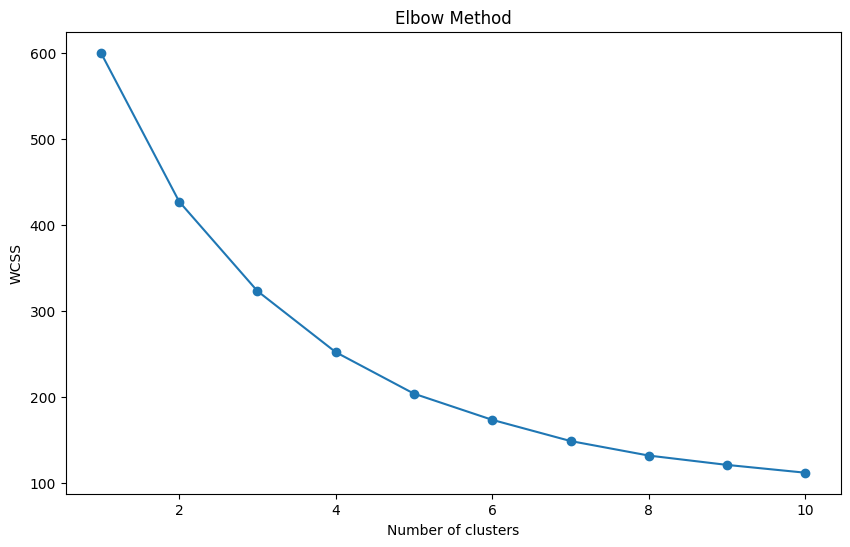

In [74]:
plt.figure(figsize=(10, 6))
plt.plot(range(1, 11), wcss, marker='o')
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

In [75]:
optimal_clusters = 5  # 예시로 5로 설정
kmeans = KMeans(n_clusters=optimal_clusters, random_state=42, n_init=10)
df['KMeans_Cluster'] = kmeans.fit_predict(df_scaled)

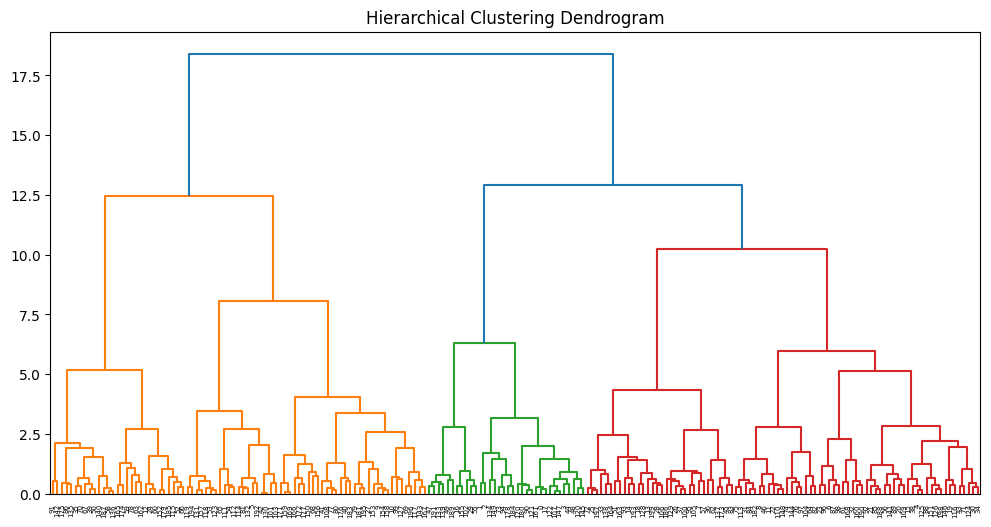

In [76]:
linked = linkage(df_scaled, method='ward')
plt.figure(figsize=(12, 6))
dendrogram(linked)
plt.title('Hierarchical Clustering Dendrogram')
plt.show()

In [77]:
df['Hierarchical_Cluster'] = fcluster(linked, optimal_clusters, criterion='maxclust')

In [78]:
dbscan = DBSCAN(eps=0.5, min_samples=5)
df['DBSCAN_Cluster'] = dbscan.fit_predict(df_scaled)

In [79]:
kmeans_score = silhouette_score(df_scaled, df['KMeans_Cluster'])
hierarchical_score = silhouette_score(df_scaled, df['Hierarchical_Cluster'])
print(f"KMeans 실루엣 점수: {kmeans_score:.2f}")
print(f"Hierarchical 실루엣 점수: {hierarchical_score:.2f}")

KMeans 실루엣 점수: 0.32
Hierarchical 실루엣 점수: 0.29


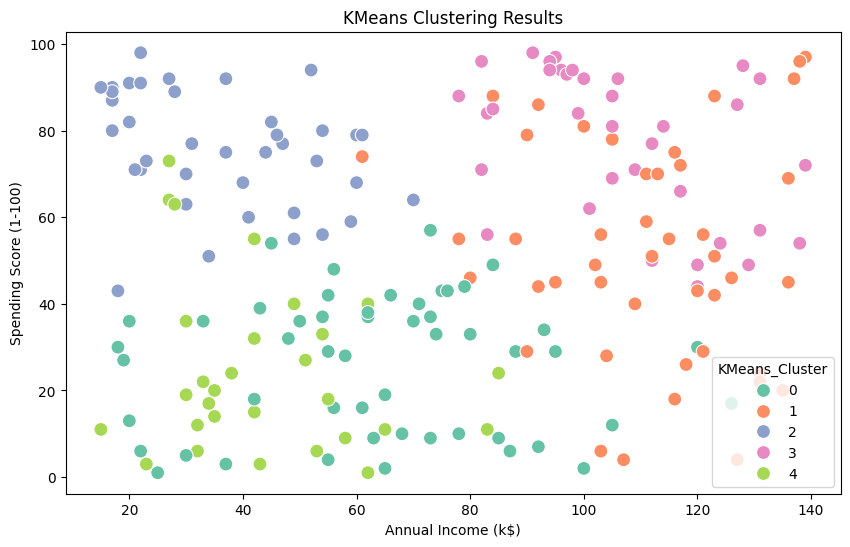

In [80]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Annual Income (k$)', y='Spending Score (1-100)',
                hue='KMeans_Cluster', data=df, palette='Set2', s=100)
plt.title('KMeans Clustering Results')
plt.show()

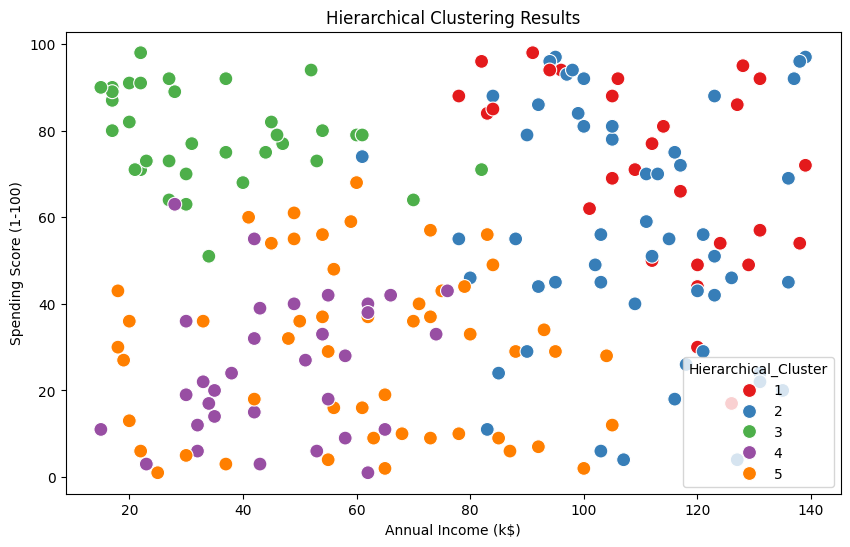

In [81]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Annual Income (k$)', y='Spending Score (1-100)',
                hue='Hierarchical_Cluster', data=df, palette='Set1', s=100)
plt.title('Hierarchical Clustering Results')
plt.show()